# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [10]:
import datahandler

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Incidents

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)
data_loader.execute(clean=True, processed=True, enhanced=True)

Loading dataset:   0%|          | 0/6 [00:00<?, ?it/s]

Loading dataset: 100%|██████████| 6/6 [00:23<00:00,  3.89s/it]


In [46]:
df = data_loader.enhanced_incidents_df

# Types of Resources

In [6]:
unique_tiltak_types = df['resource_type'].unique()
print(unique_tiltak_types)

['Ambulanse' 'Operativ Leder' 'Legebil' 'Syketransport' 'Akuttbil']


# SSB Data

In [47]:
# gathered from SSB
population_data = {
    "Date": ["2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01"],
    "Akershus Population": [584899, 594533, 604368, 614026, 624055],
    "Oslo Population": [647676, 658390, 666759, 673469, 681067]
}

pop_df = pd.DataFrame(population_data)
pop_df['Date'] = pd.to_datetime(pop_df['Date'])
pop_df.set_index('Date', inplace=True)

In [48]:
# gathered from SSB
ambulance_data = {
    "Year": [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Total Ambulance Missions": [131825, 139777, 142785, 140363, 146300, 154669, 158511, 168097, 176594, 172944, 183454, 180462],
    "Acute Ambulance Missions": [50918, 55536, 58419, 55636, 60412, 65878, 68413, 72253, 77486, 79010, 89499, 95909],
    "Urgent Ambulance Missions": [40152, 44773, 46928, 50190, 50819, 53975, 54419, 58921, 63685, 60416, 59917, 52507],
    "Non-Urgent Ambulance Missions": [40755, 39468, 37438, 34537, 35069, 34816, 35679, 36923, 35423, 33518, 34038, 32046]
}

population_data = {
    "Year": [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "Population": [599230, 613285, 623966, 634463, 647676, 658390, 666759, 673469, 681067, 693494, 697010, 699827]
}

df_ambulance = pd.DataFrame(ambulance_data).set_index("Year")
df_population = pd.DataFrame(population_data).set_index("Year")

# Ambulance Missions in Relation to Population

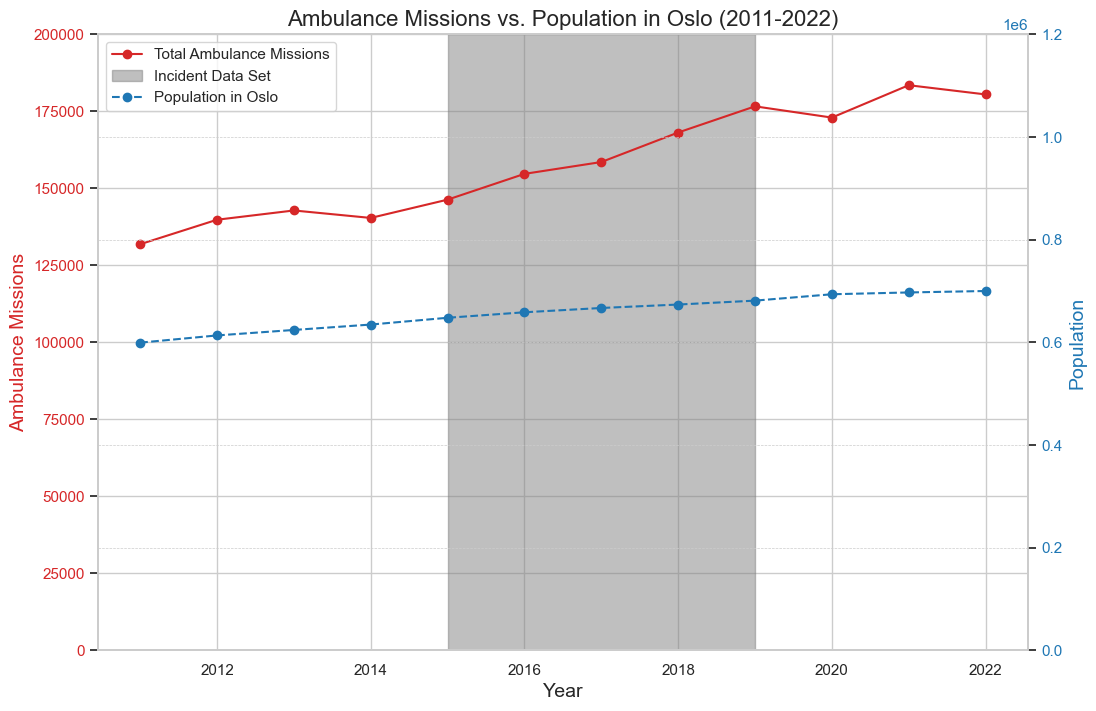

In [49]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

y_lim_top = 200000

# Ambulance data on the primary y-axis
color1 = 'tab:red'
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Ambulance Missions', color=color1, fontsize=14)
ax1.set_ylim(bottom=0, top=y_lim_top)
ax1.plot(df_ambulance.index, df_ambulance['Total Ambulance Missions'], label='Total Ambulance Missions', color=color1, marker='o')
ax1.tick_params(axis='y', labelcolor=color1)

# Gray out a section from 2015 to 2019
plt.axvspan(2015, 2019, color='grey', alpha=0.5, label='Incident Data Set')

# Population data on the secondary y-axis
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Population', color=color2, fontsize=14)
ax2.set_ylim(bottom=0, top=y_lim_top*6)
ax2.plot(df_population.index, df_population['Population'], label='Population in Oslo', color=color2, linestyle='--', marker='o')
ax2.tick_params(axis='y', labelcolor=color2)

# Handling legends for both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Create a patch for the legend entry for the grayed out section
incident_patch = mpatches.Patch(color='grey', alpha=0.5, label='Incident Data Set')

plt.legend(handles=handles1+handles2, loc='upper left')

plt.title('Ambulance Missions vs. Population in Oslo (2011-2022)', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Make sure to replace './plots/ambulance_mission_vs_population.png' with your actual path
plt.savefig('./plots/ambulance_mission_vs_population.png', dpi=300, bbox_inches='tight')

plt.show()


# Triage Categories in relation to Population (total)

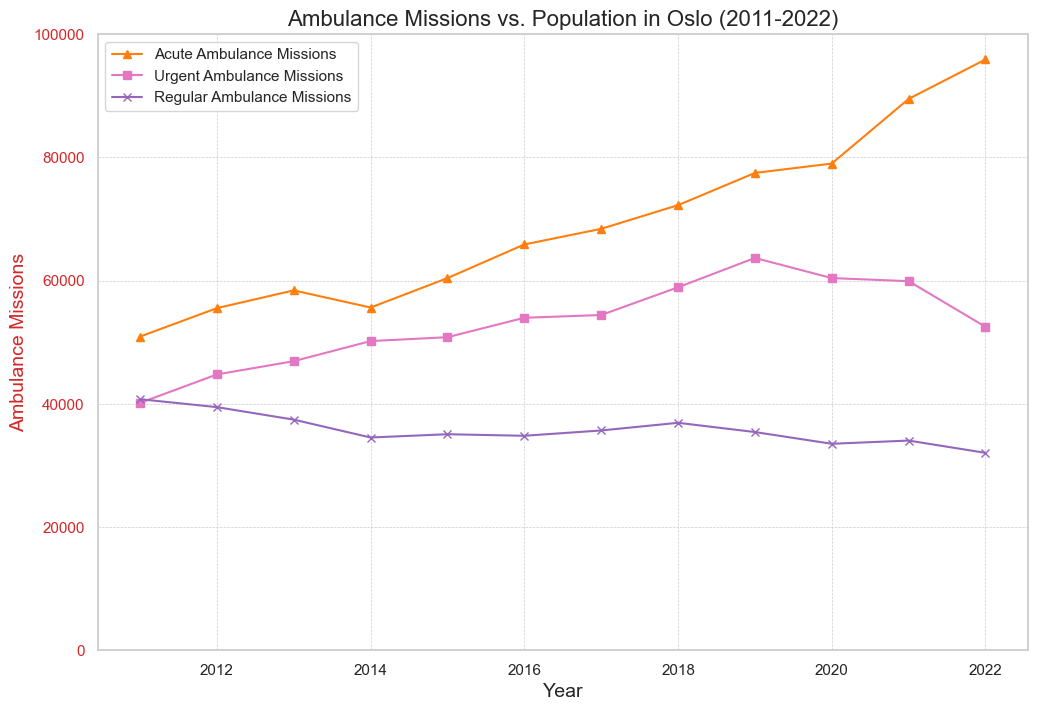

In [50]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Ambulance data on the primary y-axis
color1 = 'tab:red'
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Ambulance Missions', color=color1, fontsize=14)
ax1.set_ylim(bottom=0, top = 100000)
ax1.plot(df_ambulance.index, df_ambulance['Acute Ambulance Missions'], label='Acute Ambulance Missions', color='tab:orange', marker='^')
ax1.plot(df_ambulance.index, df_ambulance['Urgent Ambulance Missions'], label='Urgent Ambulance Missions', color='tab:pink', marker='s')
ax1.plot(df_ambulance.index, df_ambulance['Non-Urgent Ambulance Missions'], label='Regular Ambulance Missions', color='tab:purple', marker='x')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.legend(loc='upper left')

plt.title('Ambulance Missions vs. Population in Oslo (2011-2022)', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()



# Triage Categories in relation to Population (percentage)

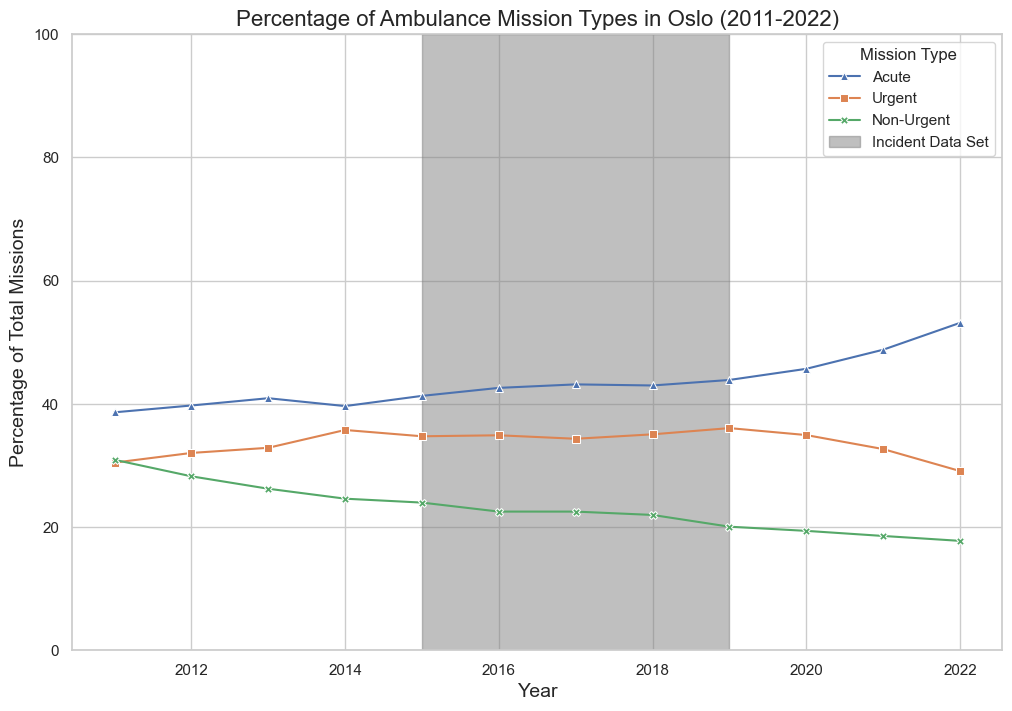

In [51]:
# Calculate the percentages first
total_missions = df_ambulance['Acute Ambulance Missions'] + df_ambulance['Urgent Ambulance Missions'] + df_ambulance['Non-Urgent Ambulance Missions']
df_ambulance['Acute Percent'] = (df_ambulance['Acute Ambulance Missions'] / total_missions) * 100
df_ambulance['Urgent Percent'] = (df_ambulance['Urgent Ambulance Missions'] / total_missions) * 100
df_ambulance['Non-Urgent Percent'] = (df_ambulance['Non-Urgent Ambulance Missions'] / total_missions) * 100

# Reshape the DataFrame
df_melted = pd.melt(df_ambulance.reset_index(), id_vars='Year', value_vars=['Acute Percent', 'Urgent Percent', 'Non-Urgent Percent'],
                    var_name='Mission Type', value_name='Percentage')

# Replace the column values to match the desired legend
df_melted['Mission Type'] = df_melted['Mission Type'].replace({'Acute Percent': 'Acute', 'Urgent Percent': 'Urgent', 'Non-Urgent Percent': 'Non-Urgent'})

# Define colors and markers.
palette = {'Acute': 'orange', 'Urgent': 'blue', 'Non-Urgent': 'green'}
markers = {'Acute': '^', 'Urgent': 's', 'Non-Urgent': 'X'}

# Plot each category individually.
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
for mission_type, color in palette.items():
    # Filter the data for the current mission type.
    df_filtered = df_melted[df_melted['Mission Type'] == mission_type]
    # Plot the filtered data.
    sns.lineplot(data=df_filtered, x='Year', y='Percentage', marker=markers[mission_type], label=mission_type)

# Gray out a section from 2015 to 2019
plt.gca().axvspan(2015, 2019, color='grey', alpha=0.5, label='Incident Data Set')

plt.title('Percentage of Ambulance Mission Types in Oslo (2011-2022)', fontsize=16)
plt.ylabel('Percentage of Total Missions', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylim(0, 100)

# Adjust the legend to include the 'Oslo Incident Set'
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Mission Type')

plt.savefig('./plots/ambulance_mission_types_percentage.png', dpi=300, bbox_inches='tight')

plt.show()


# Response Time by Month and by Day of Week

C:\Users\torju\AppData\Local\Temp\ipykernel_25604\3831642938.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='month', y='response_time', hue='triage_impression_during_call', data=df, marker='o', estimator='mean', ci=None)


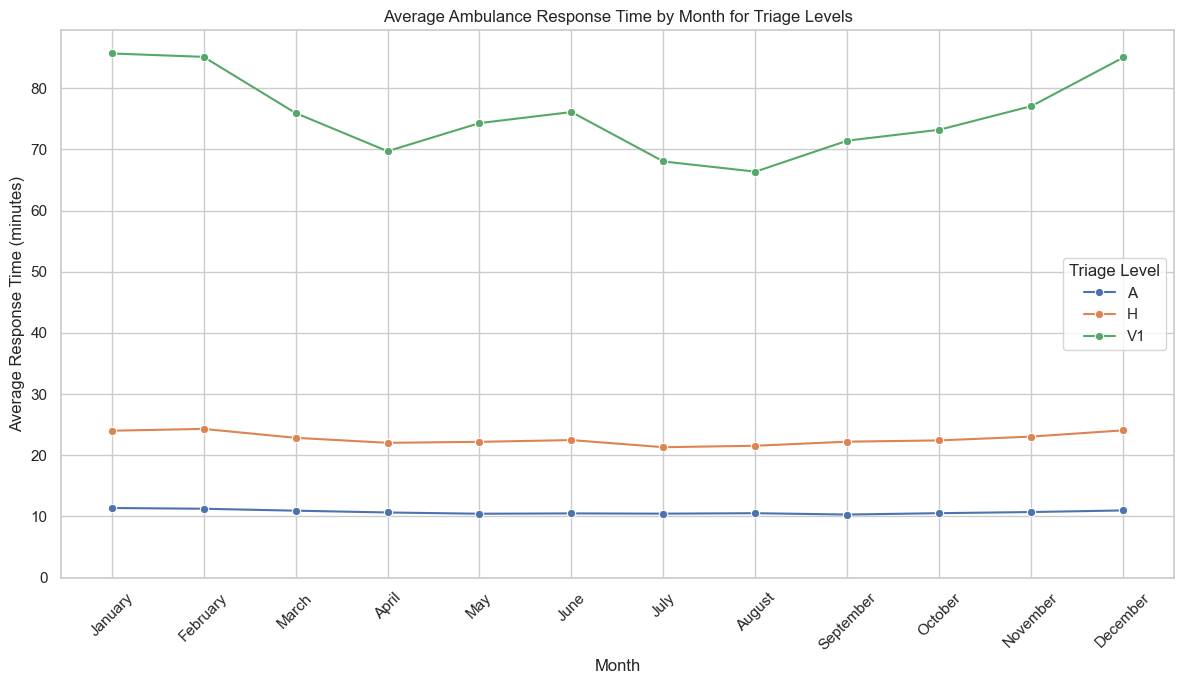

C:\Users\torju\AppData\Local\Temp\ipykernel_25604\3831642938.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='day_of_week', y='response_time', hue='triage_impression_during_call', data=df, marker='o', estimator='mean', ci=None, sort=False)


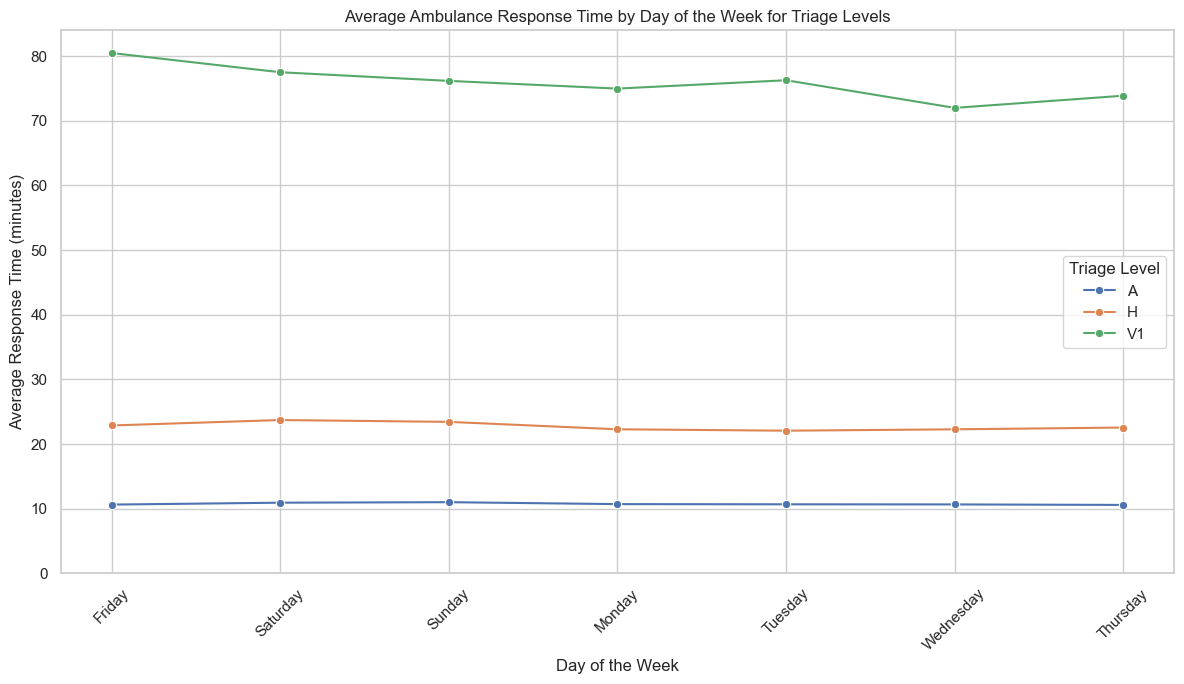

In [52]:
# Plotting - Response Time by Month for different triage levels
plt.figure(figsize=(12, 7))
sns.lineplot(x='month', y='response_time', hue='triage_impression_during_call', data=df, marker='o', estimator='mean', ci=None)
plt.title('Average Ambulance Response Time by Month for Triage Levels')
plt.xlabel('Month')
plt.ylabel('Average Response Time (minutes)')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Triage Level')
plt.tight_layout()
plt.show()

# Plotting - Response Time by Day of the Week for different triage levels
plt.figure(figsize=(12, 7))
sns.lineplot(x='day_of_week', y='response_time', hue='triage_impression_during_call', data=df, marker='o', estimator='mean', ci=None, sort=False)
plt.title('Average Ambulance Response Time by Day of the Week for Triage Levels')
plt.xlabel('Day of the Week')
plt.ylabel('Average Response Time (minutes)')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Triage Level')
plt.tight_layout()
plt.show()